<h1> InstaCart Market Basket Analysis </h1>

Whether you shop from meticulously planned grocery lists or let whimsy guide your grazing, our unique food rituals define who we are. Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

Instacart’s data science team plays a big part in providing this delightful shopping experience. Currently they use transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session. Recently, Instacart open sourced this data - see their blog post on 3 Million Instacart Orders, Open Sourced.

This dataset is taken from Kaggle.

#Datasets
#https://s3.amazonaws.com/hackerday.datascience/87/aisles.csv
#https://s3.amazonaws.com/hackerday.datascience/87/departments.csv
#https://s3.amazonaws.com/hackerday.datascience/87/sample_submission.csv
#https://s3.amazonaws.com/hackerday.datascience/87/order_products__prior.csv
#https://s3.amazonaws.com/hackerday.datascience/87/order_products__train.csv
#https://s3.amazonaws.com/hackerday.datascience/87/orders.csv
#https://s3.amazonaws.com/hackerday.datascience/87/products.csv

This problem can be solved using three different approaches:

#1. Standard MBA or Market basket analysis (association rules or arules)

#2. using a predictive model to estimate the demand for a particular product

#3. Product recommendation engine using collaborative filtering


In [35]:
# Steps:

#1. read all the csv files

#2. join the relevant files

#3. doing exploratory data analysis

#4. getting into the solution

In [ ]:
# ARULES

# Support = proportion of transactions in the invoice data which contains an iten set
# X = {milk, rice}
# Support of X = 2/20

# Confidence = confidence of a rule
# rule of buying apple(Y) given that the user has already added X
# Confidence of (X > Y) = Sup(X U Y) / Sup(X)
# X = LHS and Y = RHS
# Confidence = 2/2 = 100

# Lift = lift of a specific rule
# Lift (X > Y) = Sup(X U Y) / Sup(X) * Sup(Y)
# Lift = 2/(2*2) = 2/4 = 1/2 = 0.5


In [11]:
# Steps in creating Association rules
# Apply the minimum support criteria to identify most frequent item set
# these frequent item sets and the minimum confidence constraint are used to form rules


In [ ]:
install.packages("Hmisc")
install.packages("arules")
install.packages("arulesViz")
install.packages("stringr")
install.packages("RColorBrewer")

In [1]:
library(ggplot2)
library(plyr)
library(dplyr)
library(Hmisc)
library(readr)
library(arules)
library(arulesViz)
library(stringr)
library(data.table)
library(methods)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Hmisc' was built under R version 3.6.2"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.2"Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:plyr':

    is.discrete, summarize

The following objects are masked from 'package:base':

    format.pval, units

Warning message:
"pa

In [2]:
orders <- read.csv("orders.csv")
head(orders)

order_id user_id eval_set order_number order_dow order_hour_of_day
1 2539329  1       prior    1            2          8               
2 2398795  1       prior    2            3          7               
3  473747  1       prior    3            3         12               
4 2254736  1       prior    4            4          7               
5  431534  1       prior    5            4         15               
6 3367565  1       prior    6            2          7               
  days_since_prior_order
1 NA                    
2 15                    
3 21                    
4 29                    
5 28                    
6 19

In [3]:
products<- read.csv('products.csv')
head(products)

product_id product_name                                                     
1 1          Chocolate Sandwich Cookies                                       
2 2          All-Seasons Salt                                                 
3 3          Robust Golden Unsweetened Oolong Tea                             
4 4          Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce
5 5          Green Chile Anytime Sauce                                        
6 6          Dry Nose Oil                                                     
  aisle_id department_id
1  61      19           
2 104      13           
3  94       7           
4  38       1           
5   5      13           
6  11      11

In [4]:
order_products_prior <- read.csv('order_products__prior.csv')
head(order_products_prior)

order_id product_id add_to_cart_order reordered
1 2        33120      1                 1        
2 2        28985      2                 1        
3 2         9327      3                 0        
4 2        45918      4                 1        
5 2        30035      5                 0        
6 2        17794      6                 1

In [5]:
order_products_train <- read.csv('order_products__train.csv')
head(order_products_train)

order_id product_id add_to_cart_order reordered
1 1        49302      1                 1        
2 1        11109      2                 1        
3 1        10246      3                 0        
4 1        49683      4                 0        
5 1        43633      5                 1        
6 1        13176      6                 0

In [6]:
aisles <- read.csv('aisles.csv')
head(aisles)

aisle_id aisle                     
1 1        prepared soups salads     
2 2        specialty cheeses         
3 3        energy granola bars       
4 4        instant foods             
5 5        marinades meat preparation
6 6        other

In [7]:
departments <- read.csv('departments.csv')
head(departments)

department_id department   
1 1             frozen       
2 2             other        
3 3             bakery       
4 4             produce      
5 5             alcohol      
6 6             international

In [8]:
# which day of the week the company received most orders?

orders$day_week_name <- 
  ifelse(orders$order_dow == 0,
         'Sunday',
         ifelse(orders$order_dow == 1,
                'Monday',
                ifelse(orders$order_dow == 2,
                       'Tuesday',
                       ifelse(orders$order_dow == 3,
                              'Wednesday',
                              ifelse(orders$order_dow == 4,
                                     'Thursday',
                                     ifelse(orders$order_dow == 5,
                                            'Friday',
                                            ifelse(orders$order_dow == 6,
                                                   'Saturday',"")))))))


In [9]:
orders$day_ordered <- factor(orders$day_week_name,levels = c("Sunday",
                                                             "Monday",
                                                             "Tuesday",
                                                             "Wednesday",
                                                             "Thursday",
                                                             "Friday",
                                                             "Saturday"))



In [10]:
head(orders)

order_id user_id eval_set order_number order_dow order_hour_of_day
1 2539329  1       prior    1            2          8               
2 2398795  1       prior    2            3          7               
3  473747  1       prior    3            3         12               
4 2254736  1       prior    4            4          7               
5  431534  1       prior    5            4         15               
6 3367565  1       prior    6            2          7               
  days_since_prior_order day_week_name day_ordered
1 NA                     Tuesday       Tuesday    
2 15                     Wednesday     Wednesday  
3 21                     Wednesday     Wednesday  
4 29                     Thursday      Thursday   
5 28                     Thursday      Thursday   
6 19                     Tuesday       Tuesday

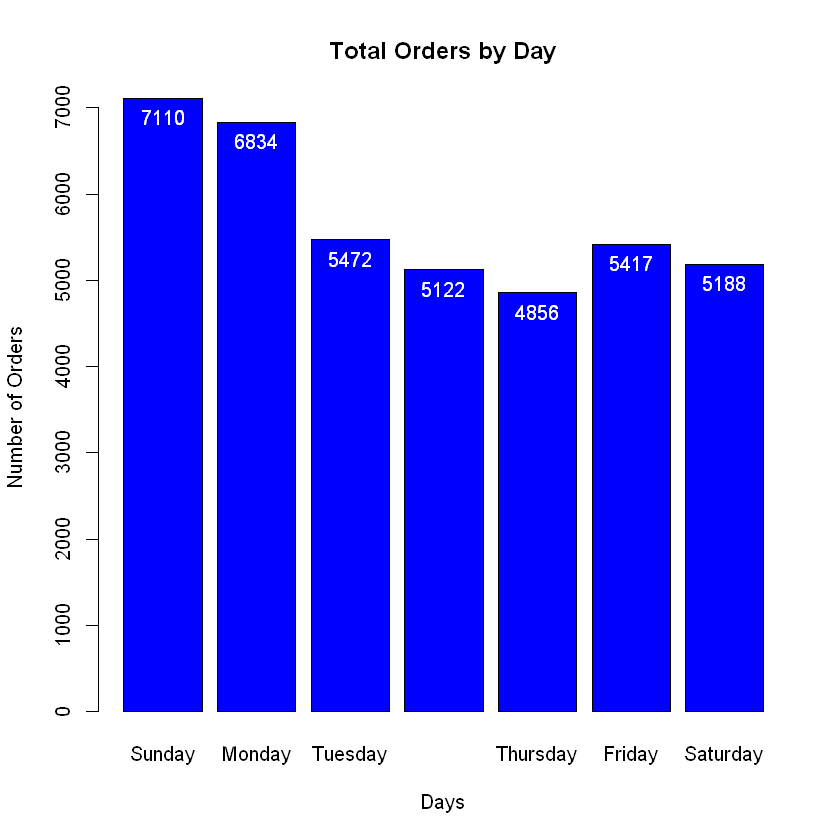

In [11]:
# visualization of orders placed by different days of the week

dow_graph <- barplot(
  table(orders$day_ordered),
  main = "Total Orders by Day",
  xlab = 'Days',
  ylab = 'Number of Orders',
  col = 'blue')

text(
  x = dow_graph,
  y = table(orders$day_ordered),
  labels = table(orders$day_ordered),
  pos = 1,
  cex = 1.0,
  col = 'white'
)


In [12]:
#join products dataset with departments dataset
products_dept <- merge(products, departments, by='department_id')


In [13]:
#join orders table with products table using order_products_train
sku_order <- left_join(right_join(orders,order_products_train[,c('order_id','product_id')], by='order_id'), products_dept, by='product_id')


In [14]:
dept_purchase_dow<- aggregate(product_id~department +order_dow, sku_order, FUN = length)
names(dept_purchase_dow) <- c('department','order_dow','num_of_orders')

In [15]:
dept_count <- aggregate(num_of_orders~ department, data = dept_purchase_dow, sum)

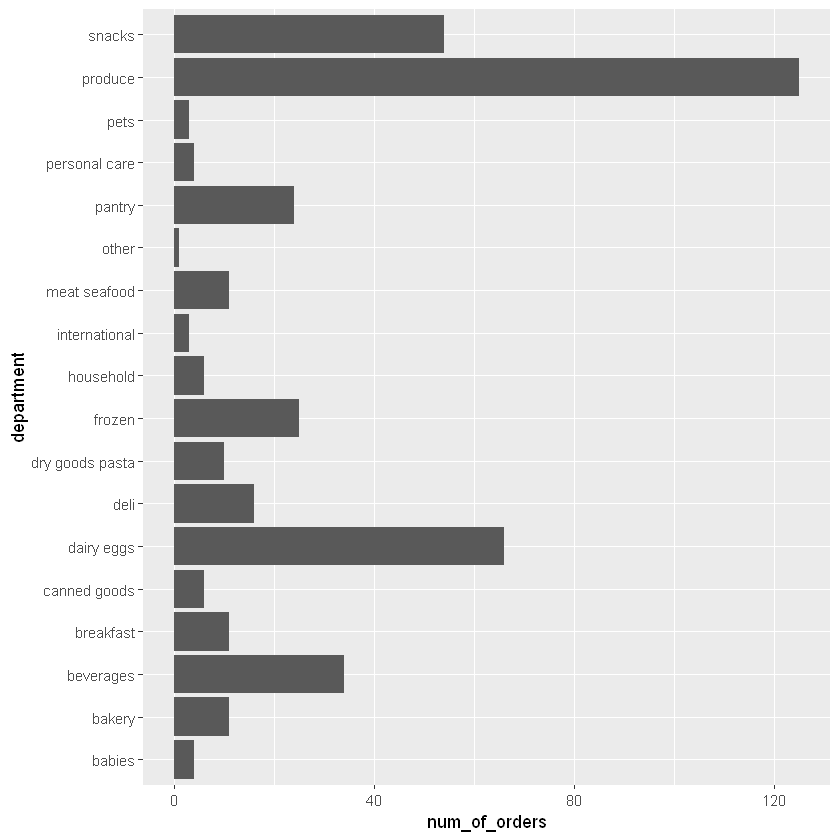

In [154]:
plot1 <- ggplot(dept_count, aes(x= department, y= num_of_orders)) + geom_bar(stat="identity") + coord_flip()
#, names.arg = dept_count$department, cex.names = 0.3)

plot1

In [16]:
library(knitr)
kable(head(orders,12))

kable(head(order_products_train,10))

kable(head(products,10))

kable(head(order_products_prior,10))

kable(head(aisles,12))

kable(head(departments,12))




| order_id| user_id|eval_set | order_number| order_dow| order_hour_of_day| days_since_prior_order|day_week_name |day_ordered |
|--------:|-------:|:--------|------------:|---------:|-----------------:|----------------------:|:-------------|:-----------|
|  2539329|       1|prior    |            1|         2|                 8|                     NA|Tuesday       |Tuesday     |
|  2398795|       1|prior    |            2|         3|                 7|                     15|Wednesday     |Wednesday   |
|   473747|       1|prior    |            3|         3|                12|                     21|Wednesday     |Wednesday   |
|  2254736|       1|prior    |            4|         4|                 7|                     29|Thursday      |Thursday    |
|   431534|       1|prior    |            5|         4|                15|                     28|Thursday      |Thursday    |
|  3367565|       1|prior    |            6|         2|                 7|                     19|Tuesday    



| order_id| product_id| add_to_cart_order| reordered|
|--------:|----------:|-----------------:|---------:|
|        1|      49302|                 1|         1|
|        1|      11109|                 2|         1|
|        1|      10246|                 3|         0|
|        1|      49683|                 4|         0|
|        1|      43633|                 5|         1|
|        1|      13176|                 6|         0|
|        1|      47209|                 7|         0|
|        1|      22035|                 8|         1|
|       36|      39612|                 1|         0|
|       36|      19660|                 2|         1|



| product_id|product_name                                                      | aisle_id| department_id|
|----------:|:-----------------------------------------------------------------|--------:|-------------:|
|          1|Chocolate Sandwich Cookies                                        |       61|            19|
|          2|All-Seasons Salt                                                  |      104|            13|
|          3|Robust Golden Unsweetened Oolong Tea                              |       94|             7|
|          4|Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce |       38|             1|
|          5|Green Chile Anytime Sauce                                         |        5|            13|
|          6|Dry Nose Oil                                                      |       11|            11|
|          7|Pure Coconut Water With Orange                                    |       98|             7|
|          8|Cut Russet Potatoes Steam N' Ma



| order_id| product_id| add_to_cart_order| reordered|
|--------:|----------:|-----------------:|---------:|
|        2|      33120|                 1|         1|
|        2|      28985|                 2|         1|
|        2|       9327|                 3|         0|
|        2|      45918|                 4|         1|
|        2|      30035|                 5|         0|
|        2|      17794|                 6|         1|
|        2|      40141|                 7|         1|
|        2|       1819|                 8|         1|
|        2|      43668|                 9|         0|
|        3|      33754|                 1|         1|



| aisle_id|aisle                      |
|--------:|:--------------------------|
|        1|prepared soups salads      |
|        2|specialty cheeses          |
|        3|energy granola bars        |
|        4|instant foods              |
|        5|marinades meat preparation |
|        6|other                      |
|        7|packaged meat              |
|        8|bakery desserts            |
|        9|pasta sauce                |
|       10|kitchen supplies           |
|       11|cold flu allergy           |
|       12|fresh pasta                |



| department_id|department      |
|-------------:|:---------------|
|             1|frozen          |
|             2|other           |
|             3|bakery          |
|             4|produce         |
|             5|alcohol         |
|             6|international   |
|             7|beverages       |
|             8|pets            |
|             9|dry goods pasta |
|            10|bulk            |
|            11|personal care   |
|            12|meat seafood    |

In [17]:
# Recoding the variables

orders <- orders %>%
  mutate(order_hour_of_day = as.numeric(order_hour_of_day),
         eval_set = as.factor(eval_set))

products <- products %>%
  mutate(product_name = as.factor(product_name))

aisles <- aisles %>%
  mutate(aisle = as.factor(aisle))

departments <- departments %>%
  mutate(department = as.factor(department))




Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

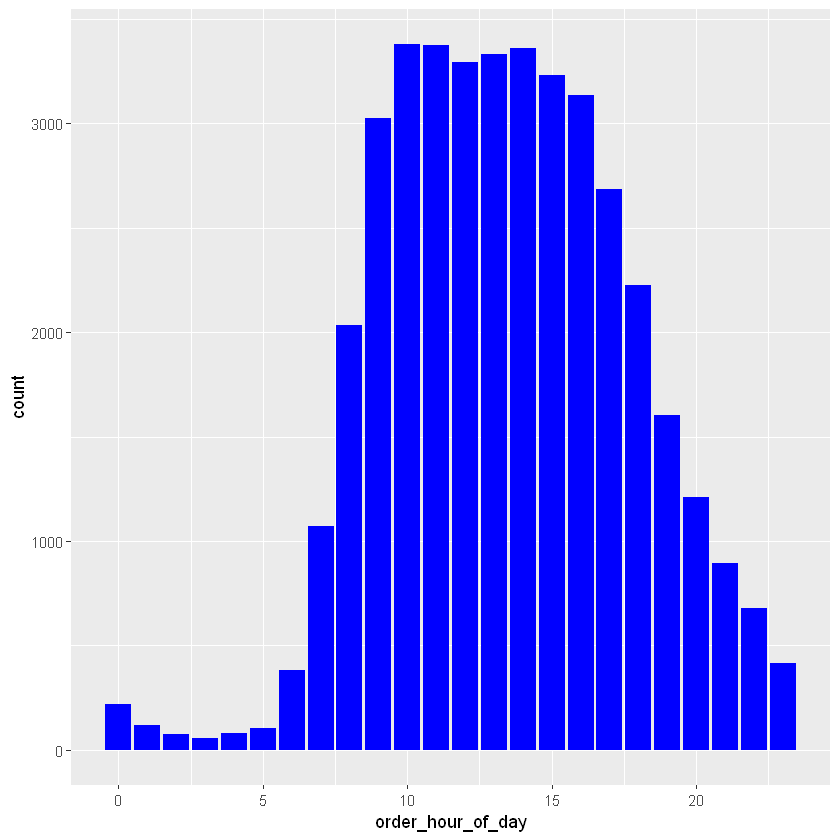

In [156]:
###graphs/visualization for orders by hour of the day
orders %>%
  ggplot(aes(x=order_hour_of_day)) +
  geom_histogram(stat = 'count',fill='blue')



Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

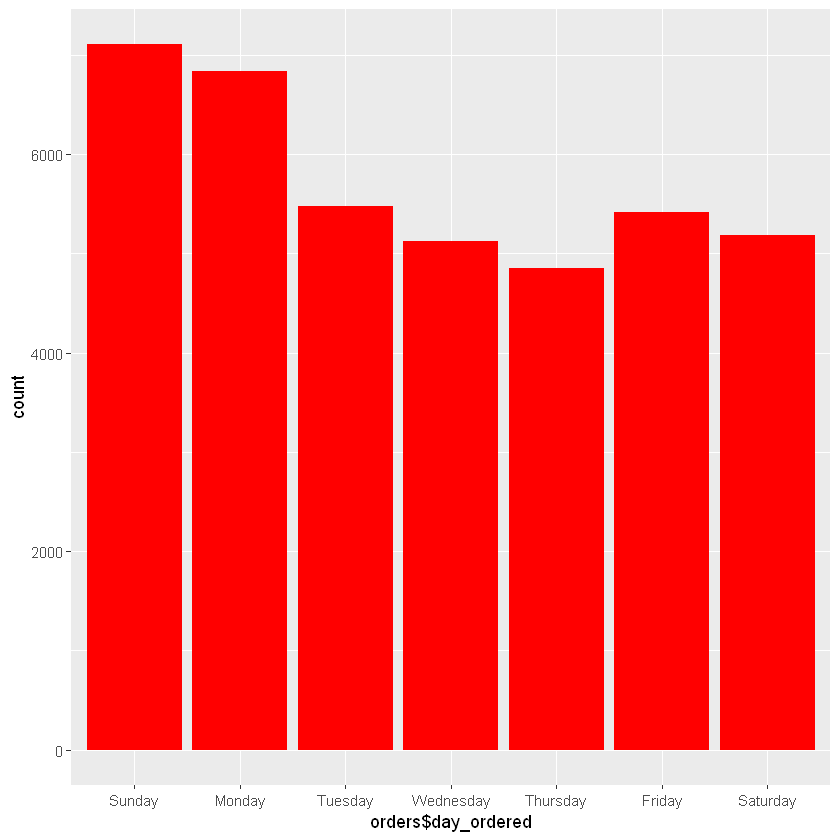

In [166]:
# orders by the day of the week

#Hypothesis
# Is there any effect of day of the week on orders

orders %>%
  ggplot(aes(x=orders$day_ordered)) +
  geom_histogram(stat = 'count',fill='red')


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"Warning message:
"Removed 2468 rows containing non-finite values (stat_count)."

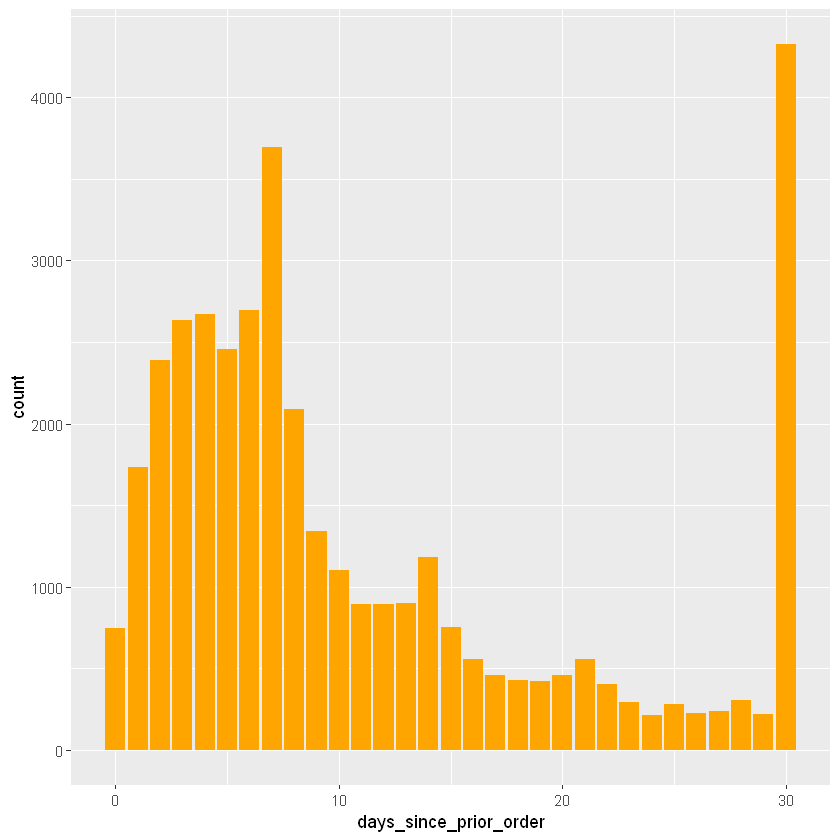

In [23]:
#conclusion: most orders are placed on Sunday==0, and Monday==1

#Hypothesis
# Do people order more often after exactly 1 week?
orders %>%
  ggplot(aes(x=days_since_prior_order)) +
  geom_histogram(stat='count',fill='orange')



Conclusion: yes they do order more often after exactly 1 week.

In [185]:

# Question: how many prior orders placed?
order_count = orders %>% filter(eval_set=='prior') %>% count_(orders,'order_number')
order_count



Warning message:
"Truncating vector to length 1"Warning message:
"Truncating vector to length 1"Warning message:
"Truncating vector to length 1"Warning message:
"Truncating vector to length 1"Warning message:
"Truncating vector to length 1"Warning message:
"Truncating vector to length 1"Warning message:
"Truncating vector to length 1"

order_id user_id eval_set order_number order_dow order_hour_of_day
1 2539329  1       prior    1            2         8                
  days_since_prior_order n    
1 NA                     37532

In [18]:
order_products_prior[1:10,]
products[1:10,]

mydata <- order_products_prior[,1:2]
mydata <- merge(mydata,products,by='product_id')

mydata <- arrange(mydata,order_id)
head(mydata)

mydata<- mydata[,c(2,3)]
head(mydata)


order_id product_id add_to_cart_order reordered
1  2        33120      1                 1        
2  2        28985      2                 1        
3  2         9327      3                 0        
4  2        45918      4                 1        
5  2        30035      5                 0        
6  2        17794      6                 1        
7  2        40141      7                 1        
8  2         1819      8                 1        
9  2        43668      9                 0        
10 3        33754      1                 1

product_id product_name                                                     
1   1         Chocolate Sandwich Cookies                                       
2   2         All-Seasons Salt                                                 
3   3         Robust Golden Unsweetened Oolong Tea                             
4   4         Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce
5   5         Green Chile Anytime Sauce                                        
6   6         Dry Nose Oil                                                     
7   7         Pure Coconut Water With Orange                                   
8   8         Cut Russet Potatoes Steam N' Mash                                
9   9         Light Strawberry Blueberry Yogurt                                
10 10         Sparkling Orange Juice & Prickly Pear Beverage                   
   aisle_id department_id
1   61      19           
2  104      13           
3   94       7           
4   38       1           
5    5      13           
6   11      11           
7   98       7           
8  116       1           
9  120      16           
10 115       7

product_id order_id product_name                             aisle_id
1  1819      2        All Natural No Stir Creamy Almond Butter  88     
2  9327      2        Garlic Powder                            104     
3 17794      2        Carrots                                   83     
4 28985      2        Michigan Organic Kale                     83     
5 30035      2        Natural Sweetener                         17     
6 33120      2        Organic Egg Whites                        86     
  department_id
1 13           
2 13           
3  4           
4  4           
5 13           
6 16

order_id product_name                            
1 2        All Natural No Stir Creamy Almond Butter
2 2        Garlic Powder                           
3 2        Carrots                                 
4 2        Michigan Organic Kale                   
5 2        Natural Sweetener                       
6 2        Organic Egg Whites

In [19]:
# dataset is disjoint
# for market basket anlysis we would need transactional dataset
# how to convert the available information to a transactional dataset

dt <- split(mydata$product_name,mydata$order_id)

dt2 = as(dt,'transactions')

summary(dt2)

glimpse(dt2)


transactions as itemMatrix in sparse format with
 3934 rows (elements/itemsets/transactions) and
 8390 columns (items) and a density of 0.0009610904 

most frequent items:
                Banana Bag of Organic Bananas   Organic Strawberries 
                   605                    510                    327 
  Organic Baby Spinach           Strawberries                (Other) 
                   275                    173                  29832 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
239 305 343 367 331 324 300 265 224 182 179 143 109 106  78  75  66  54  53  41 
 21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40  48 
 30  24  17  16   8  12   7   4   8   4   2   3   2   2   2   2   1   2   1   1 
 51 
  2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   7.000   8.064  11.000  51.000 

includes extended item information - examples:
         

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  ..@ itemInfo   :'data.frame':	8390 obs. of  1 variable:
  .. ..$ labels: chr [1:8390] "& Go! Hazelnut Spread + Pretzel Sticks" "0 Calorie Strawberry Dragonfruit Water Beverage" "0% Fat Blueberry Greek Yogurt" "0% Fat Organic Greek Vanilla Yogurt" ...
  ..@ itemsetInfo:'data.frame':	3934 obs. of  1 variable:
  .. ..$ transactionID: chr [1:3934] "2" "3" "4" "5" ...


In [199]:
#visualize the most frequent item sets in this dataset
itemFrequency(dt2,type='relative')

& Go! Hazelnut Spread + Pretzel Sticks 
                                                                                                                                         0.0002541942 
                                                                                                      0 Calorie Strawberry Dragonfruit Water Beverage 
                                                                                                                                         0.0002541942 
                                                                                                                        0% Fat Blueberry Greek Yogurt 
                                                                                                                                         0.0005083884 
                                                                                                                  0% Fat Organic Greek Vanilla Yogurt 
                                                                                                                                         0.0005083884 
                                                                                                                             0% Greek Strained Yogurt 
                                                                                                                                         0.0033045247 
                                                                                                           0% Greek Yogurt Black Cherry on the Bottom 
                                                                                                                                         0.0005083884 
                                                                                                                        0% Milkfat Greek Yogurt Honey 
                                                                                                                                         0.0002541942 
                                                                                                                                      1 % Lowfat Milk 
                                                                                                                                         0.0007625826 
                                                                                                                           1 Apple + 1 Pear Fruit Bar 
                                                                                                                                         0.0007625826 
                                                                                                                                              1 Liter 
                                                                                                                                         0.0005083884 
                                                                                                                                   1 Ply Paper Towels 
                                                                                                                                         0.0010167768 
                                                                                                                                      1% Low Fat Milk 
                                                                                                                                         0.0027961362 
                                                                                                                                       1% Lowfat Milk 
                                                                                                                                         0.0033045247 
                                                                                                                               1% Lowfat Organic Milk 
                                  

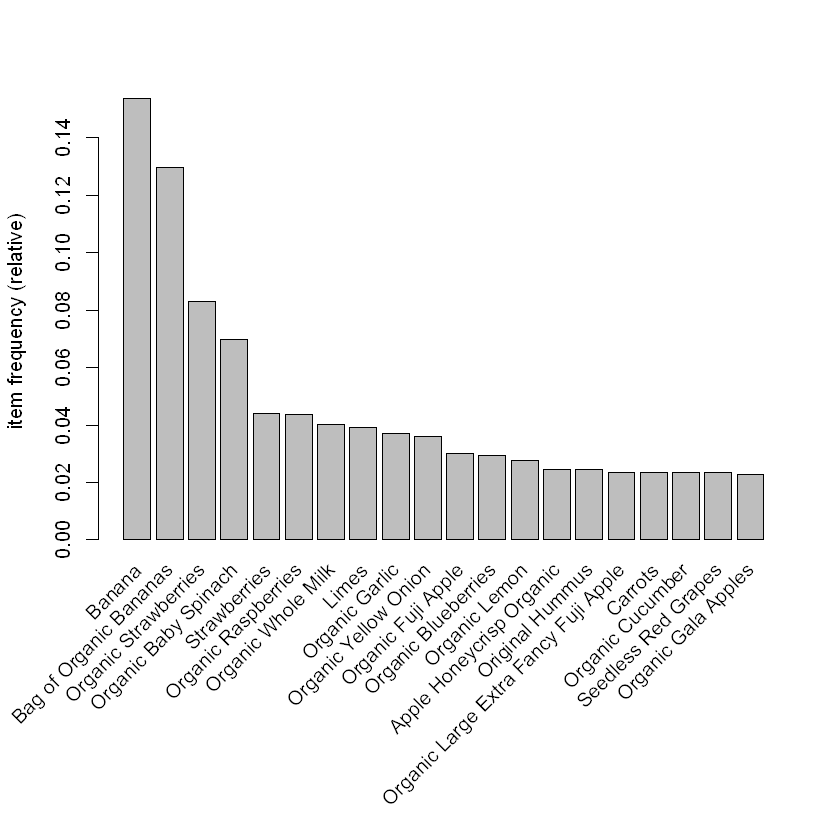

In [200]:
itemFrequencyPlot(dt2,topN=20,type='relative')

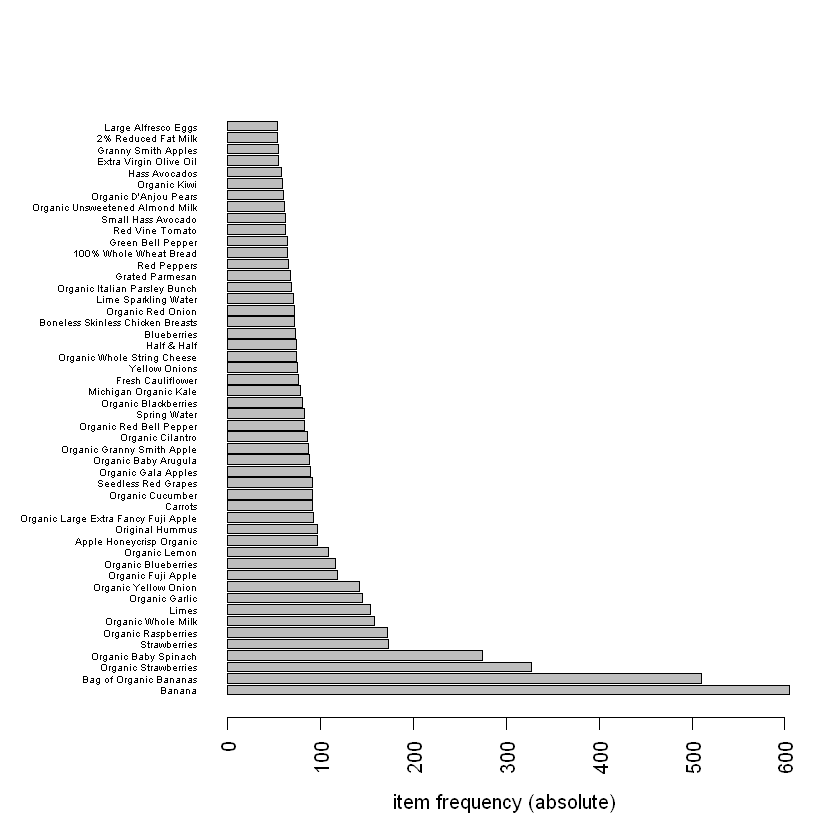

In [204]:
itemFrequencyPlot(dt2,topN=50,type='absolute', cex.names = 0.5, horiz = TRUE)


In [23]:
memory.limit(size = 2000000)

[1] 2e+06

## Apriori algorithm:
If a set of products are most frequent in a dataset, then the constituents of the most frequent set are also called most frequent.

In [20]:
#create rules

rule_1 = apriori(dt2,parameter = list(support=0.001,
                                      confidence=0.90))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.02s].
sorting and recoding items ... [1821 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.02s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


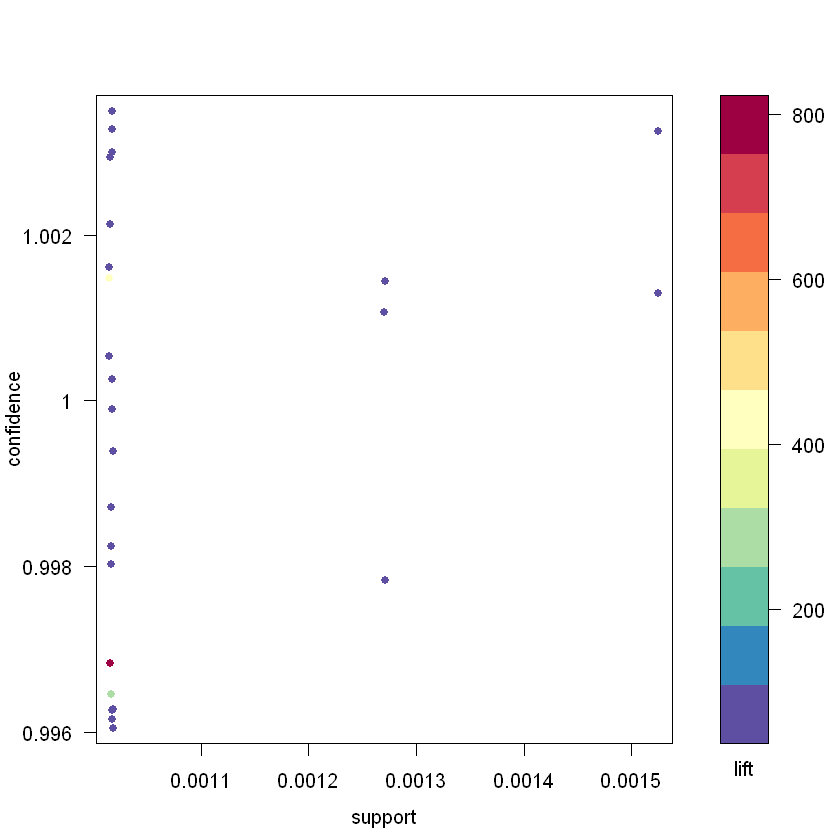

In [21]:
plot(rule_1,control = list(col=brewer.pal(11,"Spectral")),main="")


In [23]:

summary(rule_1)

rule_2 <- apriori(dt2,
                  parameter = list(support=0.001,
                                   confidence=0.8,
                                   minlen=3))

rule_3 <- apriori(dt2,
                  parameter = list(support=0.001,
                                   confidence=0.8,
                                   maxlen=4))


set of 25 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 4 20  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    3.00    3.00    2.88    3.00    4.00 

summary of quality measures:
    support           confidence      lift             count     
 Min.   :0.001017   Min.   :1    Min.   :  6.503   Min.   :4.00  
 1st Qu.:0.001017   1st Qu.:1    1st Qu.:  7.714   1st Qu.:4.00  
 Median :0.001017   Median :1    Median :  7.714   Median :4.00  
 Mean   :0.001088   Mean   :1    Mean   : 69.236   Mean   :4.28  
 3rd Qu.:0.001017   3rd Qu.:1    3rd Qu.: 14.306   3rd Qu.:4.00  
 Max.   :0.001525   Max.   :1    Max.   :786.800   Max.   :6.00  

mining info:
 data ntransactions support confidence
  dt2          3934   0.001        0.9

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.01s].
sorting and recoding items ... [1821 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.02s].
writing ... [40 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      4  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort ve

Warning message in apriori(dt2, parameter = list(support = 0.001, confidence = 0.8, :
"Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!"

 done [0.02s].
writing ... [57 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [24]:
# converting the rules into a data frame
rules1 = as(rule_1,'data.frame')

inspect(subset(rule_1,subset= rhs %pin% 'Banana'))

# before recommending the products to the company you can sort the rules
inspect(head(sort(rule_1,by='lift'),5))

summary(rule_1)


     lhs                                                                   rhs                          support confidence     lift count
[1]  {Deli Fresh Honey Smoked Turkey Breast, 98% Fat Free, Gluten Free} => {Banana}                 0.001016777          1 6.502479     4
[2]  {Quaker Life Cinnamon Cereal}                                      => {Banana}                 0.001016777          1 6.502479     4
[3]  {Organic Chamomile with Lavender Herbal Tea Bags}                  => {Bag of Organic Bananas} 0.001016777          1 7.713725     4
[4]  {Celery Hearts,                                                                                                                     
      Organic Raspberries}                                              => {Bag of Organic Bananas} 0.001016777          1 7.713725     4
[5]  {Organic Bread with 21 Whole Grains,                                                                                                
      Organic Large Grade AA Brown

set of 25 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 4 20  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    3.00    3.00    2.88    3.00    4.00 

summary of quality measures:
    support           confidence      lift             count     
 Min.   :0.001017   Min.   :1    Min.   :  6.503   Min.   :4.00  
 1st Qu.:0.001017   1st Qu.:1    1st Qu.:  7.714   1st Qu.:4.00  
 Median :0.001017   Median :1    Median :  7.714   Median :4.00  
 Mean   :0.001088   Mean   :1    Mean   : 69.236   Mean   :4.28  
 3rd Qu.:0.001017   3rd Qu.:1    3rd Qu.: 14.306   3rd Qu.:4.00  
 Max.   :0.001525   Max.   :1    Max.   :786.800   Max.   :6.00  

mining info:
 data ntransactions support confidence
  dt2          3934   0.001        0.9

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 25 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

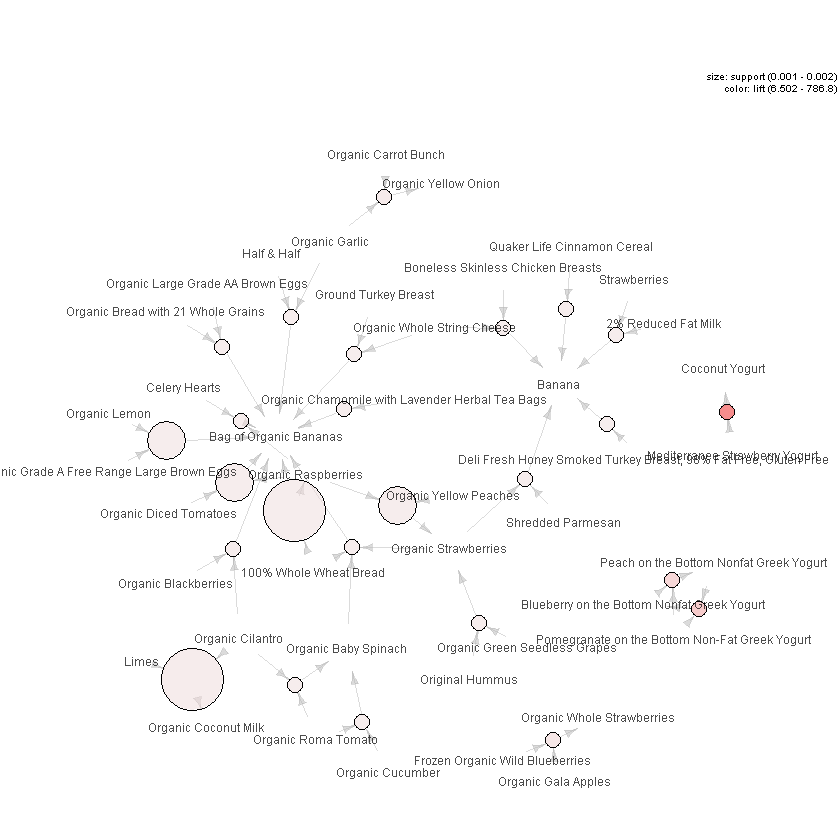

In [27]:

plot_rule <- plot(rule_1,method = 'graph',control = list(type='items',main=''), cex = 0.6)



Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 10 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

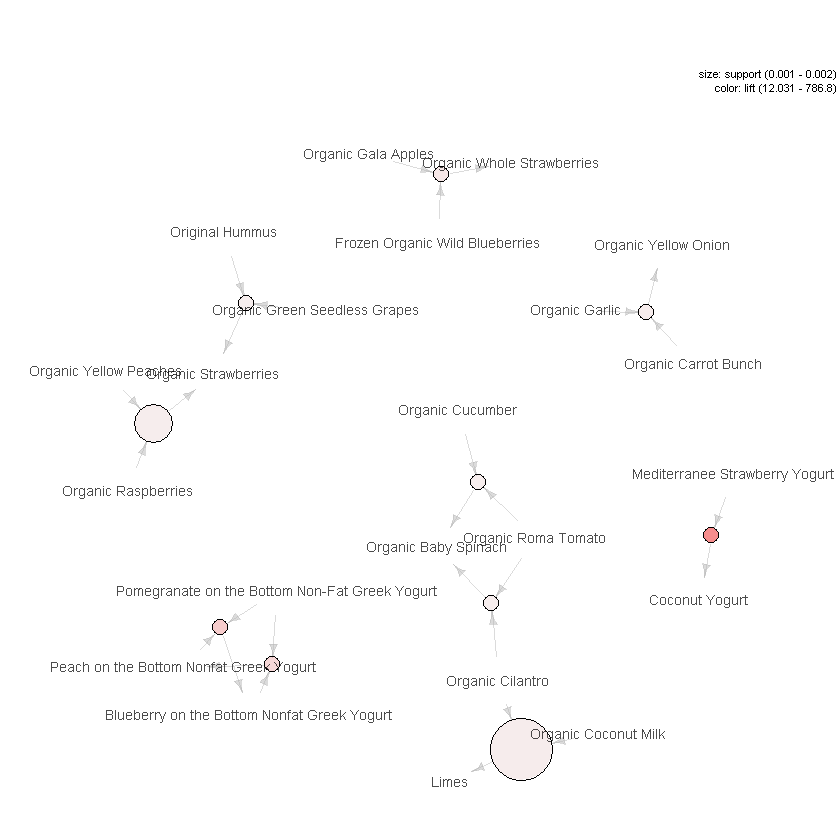

In [28]:
subrule1 <- head(sort(rule_1,by='lift'),10)

plot(subrule1,method = 'graph',control = list(type='items',main=''), cex = 0.7)


From the above graphs we can distinguish the important rules and the most frequent products purchased, with a higher value of lift.

In [29]:

# shall we continue with the existing set of rules?

# NO, because we need to clear the redundant rules from the set

# identify the unnecessary rules
subset.matrix = is.subset(rule_1,rule_1)
subset.matrix[lower.tri(subset.matrix,diag = T)] <- NA

redundant = colSums(subset.matrix, na.rm = T) >= 1
which(redundant)


Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."

{Banana,Deli Fresh Honey Smoked Turkey Breast, 98% Fat Free, Gluten Free} 
                                                                                                                                   1 
                                                                                                {Banana,Quaker Life Cinnamon Cereal} 
                                                                                                                                   2 
                                                                                     {Coconut Yogurt,Mediterranee Strawberry Yogurt} 
                                                                                                                                   3 
                                                            {Bag of Organic Bananas,Organic Chamomile with Lavender Herbal Tea Bags} 
                                                                                                                                   4 
{Blueberry on the Bottom Nonfat Greek Yogurt,Peach on the Bottom Nonfat Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt} 
                                                                                                                                   5 
{Blueberry on the Bottom Nonfat Greek Yogurt,Peach on the Bottom Nonfat Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt} 
                                                                                                                                   6 
                                                                          {Bag of Organic Bananas,Celery Hearts,Organic Raspberries} 
                                                                                                                                   7 
                                       {Bag of Organic Bananas,Organic Bread with 21 Whole Grains,Organic Large Grade AA Brown Eggs} 
                                                                                                                                   8 
                                                                         {Organic Baby Spinach,Organic Cilantro,Organic Roma Tomato} 
                                                                                                                                   9 
                                                                         {Organic Baby Spinach,Organic Cucumber,Organic Roma Tomato} 
                                                                                                                                  10 
                                                                   {Organic Raspberries,Organic Strawberries,Organic Yellow Peaches} 
                                                                                                                                  11 
                                                           {Bag of Organic Bananas,Ground Turkey Breast,Organic Whole String Cheese} 
                                                                                                                                  12 
                                                                 {Bag of Organic Bananas,Organic Diced Tomatoes,Organic Raspberries} 
                                                                                                                                  13 
                                                                                       {Limes,Organic Cilantro,Organic Coconut Milk} 
                                                                                                                                  14 
                                                                {Organic Green Seedless Grapes,Organic Strawberries,Original Hummus} 
                                                                                                                                  15 
                                       

In [34]:

rule1_pruned <- rule_1[!redundant]
rules<-rule1_pruned

# clean the rules
inspect(rules)
rules

set of 0 rules 

This means there are no redundant rules at all, and all the rules are important.